In [ ]:
# Business Problem
# The healthcare industry suffers from a common issue of patients failing to attend scheduled appointments, also known as "no-shows." This problem significantly affects healthcare providers and facilities by causing inefficiencies, resource wastage, and loss of revenue. Missed appointments lead to unutilized time for medical staff, while also preventing other patients from receiving timely care. Additionally, healthcare organizations are financially impacted by the reduction in patient turnover, which lowers the overall revenue stream.

# Who does the problem affect? What are the financial and social implications of a potential solution?
# This problem impacts both healthcare providers and patients. Providers lose both time and money when patients fail to show up, while patients who miss appointments may face deteriorating health conditions due to delays in care. From a social perspective, no-shows can lead to longer wait times for appointments, reducing the availability of services for other patients. A potential solution to this problem through predictive analytics could help healthcare providers identify patients who are likely to miss their appointments. This would allow the implementation of strategies such as sending reminders, follow-up calls, or adjusting scheduling methods, improving both operational efficiency and patient health outcomes.

In [ ]:
# Exploratory Data Analysis

from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/KaggleV2-May-2016.csv'

import pandas as pd

df = pd.read_csv(file_path)

df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

df['DaysBetween'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

data_info = df.info()  # Use 'df' instead of 'data'
data_head = df.head()  # Use 'df' instead of 'data'

missing_values = df.isnull().sum()  # Use 'df' instead of 'data'
basic_stats = df.describe()  # Use 'df' instead of 'data'

data_info, data_head, missing_values, basic_stats

age_distribution = df['Age'].describe()  # Use 'df' instead of 'data_cleaned'
gender_distribution = df['Gender'].value_counts()  # Use 'df' instead of 'data_cleaned'
no_show_distribution = df['No-show'].value_counts(normalize=True)  # Use 'df' instead of 'data_cleaned'
days_between_distribution = df['DaysBetween'].describe()  # Now 'DaysBetween' should exist

age_distribution, gender_distribution, no_show_distribution, days_between_distribution

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  H

(count    110527.000000
 mean         37.088874
 std          23.110205
 min          -1.000000
 25%          18.000000
 50%          37.000000
 75%          55.000000
 max         115.000000
 Name: Age, dtype: float64,
 Gender
 F    71840
 M    38687
 Name: count, dtype: int64,
 No-show
 No     0.798067
 Yes    0.201933
 Name: proportion, dtype: float64,
 count    110527.000000
 mean          9.183702
 std          15.254996
 min          -7.000000
 25%          -1.000000
 50%           3.000000
 75%          14.000000
 max         178.000000
 Name: DaysBetween, dtype: float64)

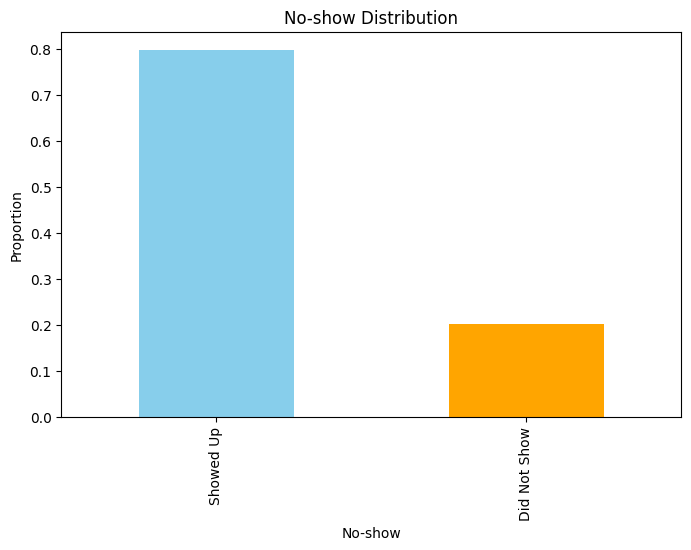

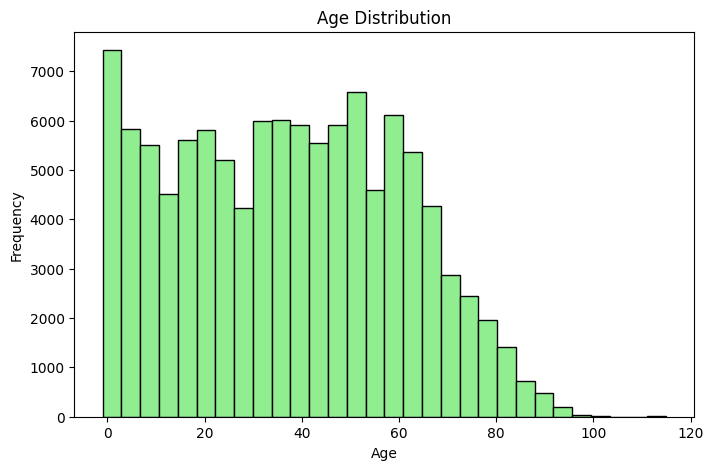

<Figure size 800x500 with 0 Axes>

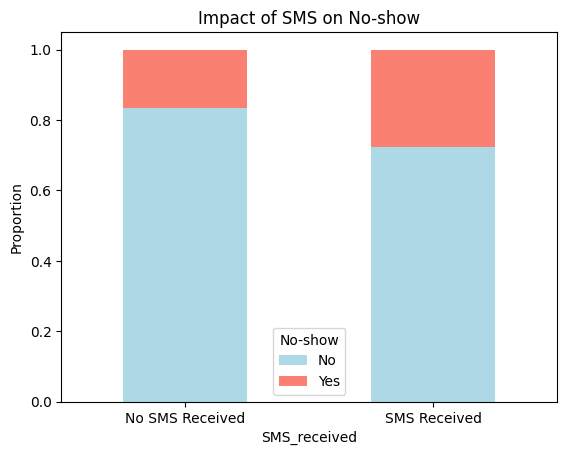

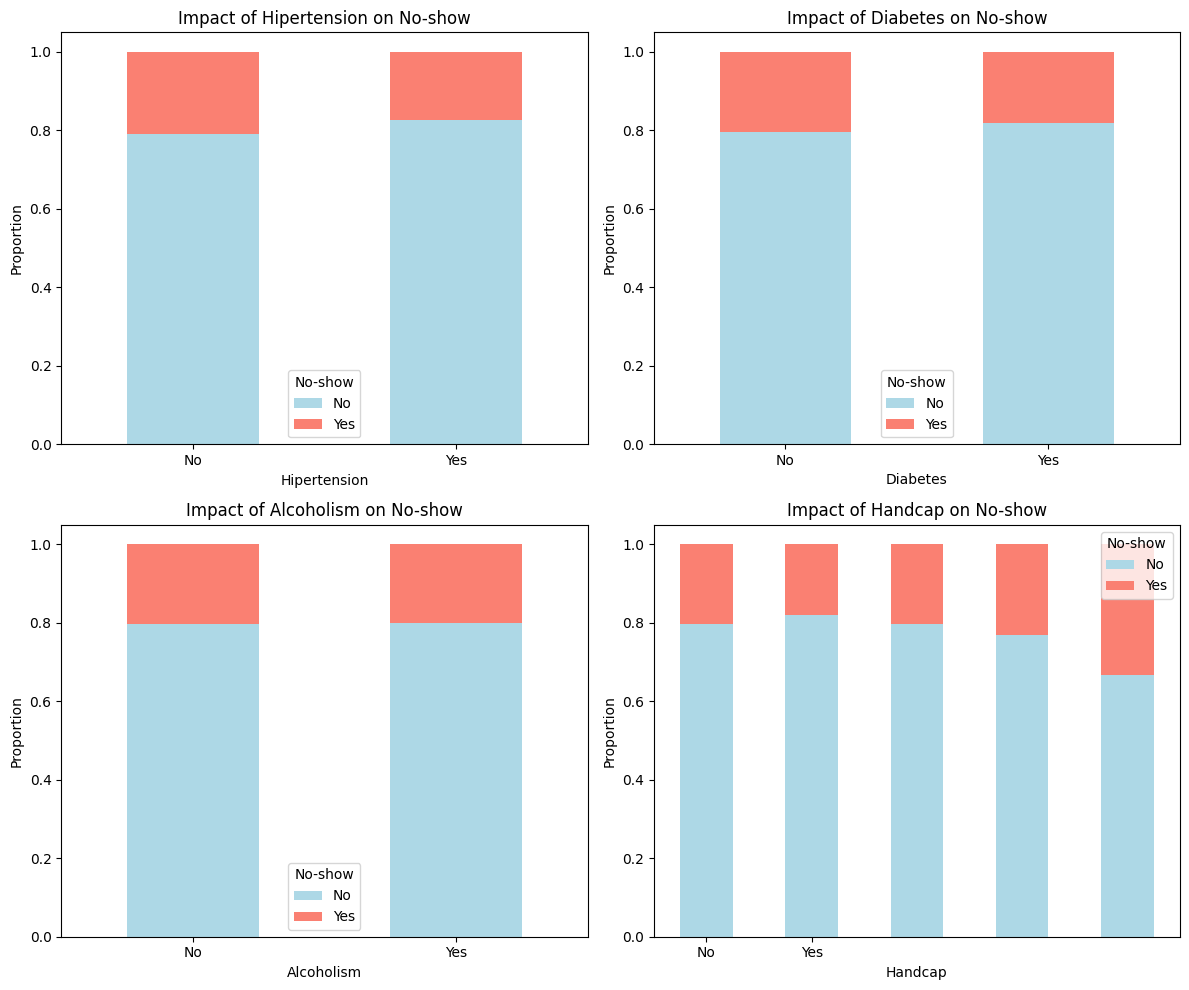

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
df['No-show'].value_counts(normalize=True).plot(kind='bar', color=['skyblue', 'orange'])
plt.title('No-show Distribution')
plt.xticks([0, 1], labels=['Showed Up', 'Did Not Show'])
plt.ylabel('Proportion')
plt.show()

plt.figure(figsize=(8, 5))
df['Age'].plot(kind='hist', bins=30, color='lightgreen', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 5))
pd.crosstab(df['SMS_received'], df['No-show'], normalize='index').plot(kind='bar', stacked=True, color=['lightblue', 'salmon'])
plt.title('Impact of SMS on No-show')
plt.xticks([0, 1], labels=['No SMS Received', 'SMS Received'], rotation=0)
plt.ylabel('Proportion')
plt.show()

health_conditions = ['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap']
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for idx, condition in enumerate(health_conditions):
    ax = axes[idx//2, idx%2]
    pd.crosstab(df[condition], df['No-show'], normalize='index').plot(kind='bar', stacked=True, ax=ax, color=['lightblue', 'salmon'])
    ax.set_title(f'Impact of {condition} on No-show')
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['No', 'Yes'], rotation=0)
    ax.set_ylabel('Proportion')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

df = pd.read_csv(file_path)

df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

df['DaysBetween'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

df_encoded = pd.get_dummies(df, columns=['Gender', 'Neighbourhood'], drop_first=True)

df_encoded = df_encoded.drop(columns=['ScheduledDay', 'AppointmentDay'])

target = 'No-show'
X = df_encoded.drop(columns=[target])  # Features (excluding target)
y = df_encoded[target]                 # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --------------------- Logistic Regression ---------------------

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Evaluate Logistic Regression
log_reg_acc = accuracy_score(y_test, y_pred_log_reg)
log_reg_report = classification_report(y_test, y_pred_log_reg)
log_reg_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test_scaled)[:, 1])

# --------------------- Decision Tree ---------------------

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_scaled, y_train)
y_pred_tree = decision_tree.predict(X_test_scaled)

# Evaluate Decision Tree
tree_acc = accuracy_score(y_test, y_pred_tree)
tree_report = classification_report(y_test, y_pred_tree)
tree_auc = roc_auc_score(y_test, decision_tree.predict_proba(X_test_scaled)[:, 1])

# --------------------- Random Forest ---------------------

random_forest = RandomForestClassifier(random_state=42, n_estimators=100)
random_forest.fit(X_train_scaled, y_train)
y_pred_rf = random_forest.predict(X_test_scaled)

# Evaluate Random Forest
rf_acc = accuracy_score(y_test, y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf)
rf_auc = roc_auc_score(y_test, random_forest.predict_proba(X_test_scaled)[:, 1])

# --------------------- Display Results ---------------------

model_results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [log_reg_acc, tree_acc, rf_acc],
    'AUC': [log_reg_auc, tree_auc, rf_auc]
})

print("Logistic Regression Report:\n", log_reg_report)
print("Decision Tree Report:\n", tree_report)
print("Random Forest Report:\n", rf_report)

print("\nModel Comparison:\n", model_results)


Logistic Regression Report:
               precision    recall  f1-score   support

          No       0.80      0.99      0.89     26525
         Yes       0.35      0.02      0.03      6634

    accuracy                           0.80     33159
   macro avg       0.58      0.50      0.46     33159
weighted avg       0.71      0.80      0.72     33159

Decision Tree Report:
               precision    recall  f1-score   support

          No       0.84      0.83      0.83     26525
         Yes       0.34      0.35      0.35      6634

    accuracy                           0.74     33159
   macro avg       0.59      0.59      0.59     33159
weighted avg       0.74      0.74      0.74     33159

Random Forest Report:
               precision    recall  f1-score   support

          No       0.82      0.97      0.89     26525
         Yes       0.51      0.14      0.22      6634

    accuracy                           0.80     33159
   macro avg       0.67      0.55      0.55     33159

In [ ]:
model_results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [log_reg_acc, tree_acc, rf_acc],
    'AUC': [log_reg_auc, tree_auc, rf_auc]
})

print("Logistic Regression Report:\n", log_reg_report)
print("Decision Tree Report:\n", tree_report)
print("Random Forest Report:\n", rf_report)

print("\nModel Comparison:\n", model_results)

best_model_accuracy = model_results.loc[model_results['Accuracy'].idxmax(), 'Model']
best_model_auc = model_results.loc[model_results['AUC'].idxmax(), 'Model']

print(f"\nBest Model Based on Accuracy: {best_model_accuracy}")
print(f"Best Model Based on AUC: {best_model_auc}")


Logistic Regression Report:
               precision    recall  f1-score   support

          No       0.80      0.99      0.89     26525
         Yes       0.35      0.02      0.03      6634

    accuracy                           0.80     33159
   macro avg       0.58      0.50      0.46     33159
weighted avg       0.71      0.80      0.72     33159

Decision Tree Report:
               precision    recall  f1-score   support

          No       0.84      0.83      0.83     26525
         Yes       0.34      0.35      0.35      6634

    accuracy                           0.74     33159
   macro avg       0.59      0.59      0.59     33159
weighted avg       0.74      0.74      0.74     33159

Random Forest Report:
               precision    recall  f1-score   support

          No       0.82      0.97      0.89     26525
         Yes       0.51      0.14      0.22      6634

    accuracy                           0.80     33159
   macro avg       0.67      0.55      0.55     33159